In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# Specify the path to your text file
file_path = r'C:\Users\THINKPAD\OneDrive\Desktop\Ramlla\Week_3\notebooks\task1\data\MachineLearningRating_v3.txt'

# Load the data from the text file into a DataFrame with the correct delimiter
data = pd.read_csv(file_path, delimiter='|')

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)    

# Display the first few rows of the DataFrame
data.head()


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_17704\2407160250.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [74]:

print(data.columns[32])  # Column name at index 32
print(data.columns[37])  # Column name at index 37


CapitalOutstanding
CrossBorder


In [75]:
# Display unique values and their types in the problematic columns
print(data['CapitalOutstanding'].apply(type).value_counts())
print(data['CrossBorder'].apply(type).value_counts())

CapitalOutstanding
<class 'float'>    458752
<class 'int'>      377506
<class 'str'>      163840
Name: count, dtype: int64
CrossBorder
<class 'float'>    999400
<class 'str'>         698
Name: count, dtype: int64


In [76]:
def clean_numeric_column(df, column_name):
    """
    Cleans a numeric column by removing non-numeric characters, converting to numeric,
    and handling NaN values.
    """
    df[column_name] = df[column_name].astype(str)  # Convert to string
    df[column_name] = df[column_name].str.replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  # Convert to numeric
    df[column_name] = df[column_name].fillna(0)  # Handle NaN values

# Apply the cleaning function to both columns
clean_numeric_column(data, 'CapitalOutstanding')
clean_numeric_column(data, 'CrossBorder')

# Verify the changes
print(data['CapitalOutstanding'].dtype)
print(data['CapitalOutstanding'].describe())

print(data['CrossBorder'].dtype)
print(data['CrossBorder'].describe())

float64
count    1.000098e+06
mean     6.161010e+04
std      5.155411e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.857000e+07
Name: CapitalOutstanding, dtype: float64
float64
count    1000098.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: CrossBorder, dtype: float64


In [77]:
# Display unique values and their types in the capitaloutstanding and crossborder column 
print(data['CapitalOutstanding'].apply(type).value_counts())
print(data['CrossBorder'].apply(type).value_counts())


CapitalOutstanding
<class 'float'>    1000098
Name: count, dtype: int64
CrossBorder
<class 'float'>    1000098
Name: count, dtype: int64


In [78]:
# Display column names and their data types
print(data.columns)
print(data.dtypes)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMo

In [79]:
# Descriptive statistics
print(data.describe())

# Data types and structure
print(data.info())


       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [80]:
# Check for missing values
print(data.isnull().sum())



UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

COLUMNS WITH HIGH MISSING VALUE
NumberOfVehiclesInFleet       1,000,098
CustomValueEstimate            779,642
WrittenOff, Rebuilt, Converted   641,901
NewVehicle                      153,295
Bank                            145,961

#  Univariate Analysis
a. Distribution of Numerical Variables:

HIGHEST MISSING VALUES
NumberOfVehiclesInFleet     1000098
WrittenOff                   641901
Rebuilt                      641901
Converted                    641901
CustomValueEstimate          779642
Bank                         145961

In [84]:
# Identify Missing Values
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().mean() * 100
print("\nPercentage of Missing Values for Each Column:\n")
print(missing_percentage)




Percentage of Missing Values for Each Column:

UnderwrittenCoverID           0.000000
PolicyID                      0.000000
TransactionMonth              0.000000
IsVATRegistered               0.000000
Citizenship                   0.000000
LegalType                     0.000000
Title                         0.000000
Language                      0.000000
Bank                         14.594670
AccountType                   4.022806
MaritalStatus                 0.825819
Gender                        0.953507
Country                       0.000000
Province                      0.000000
PostalCode                    0.000000
MainCrestaZone                0.000000
SubCrestaZone                 0.000000
ItemType                      0.000000
mmcode                        0.055195
VehicleType                   0.055195
RegistrationYear              0.000000
make                          0.055195
Model                         0.055195
Cylinders                     0.055195
cubiccapacity   

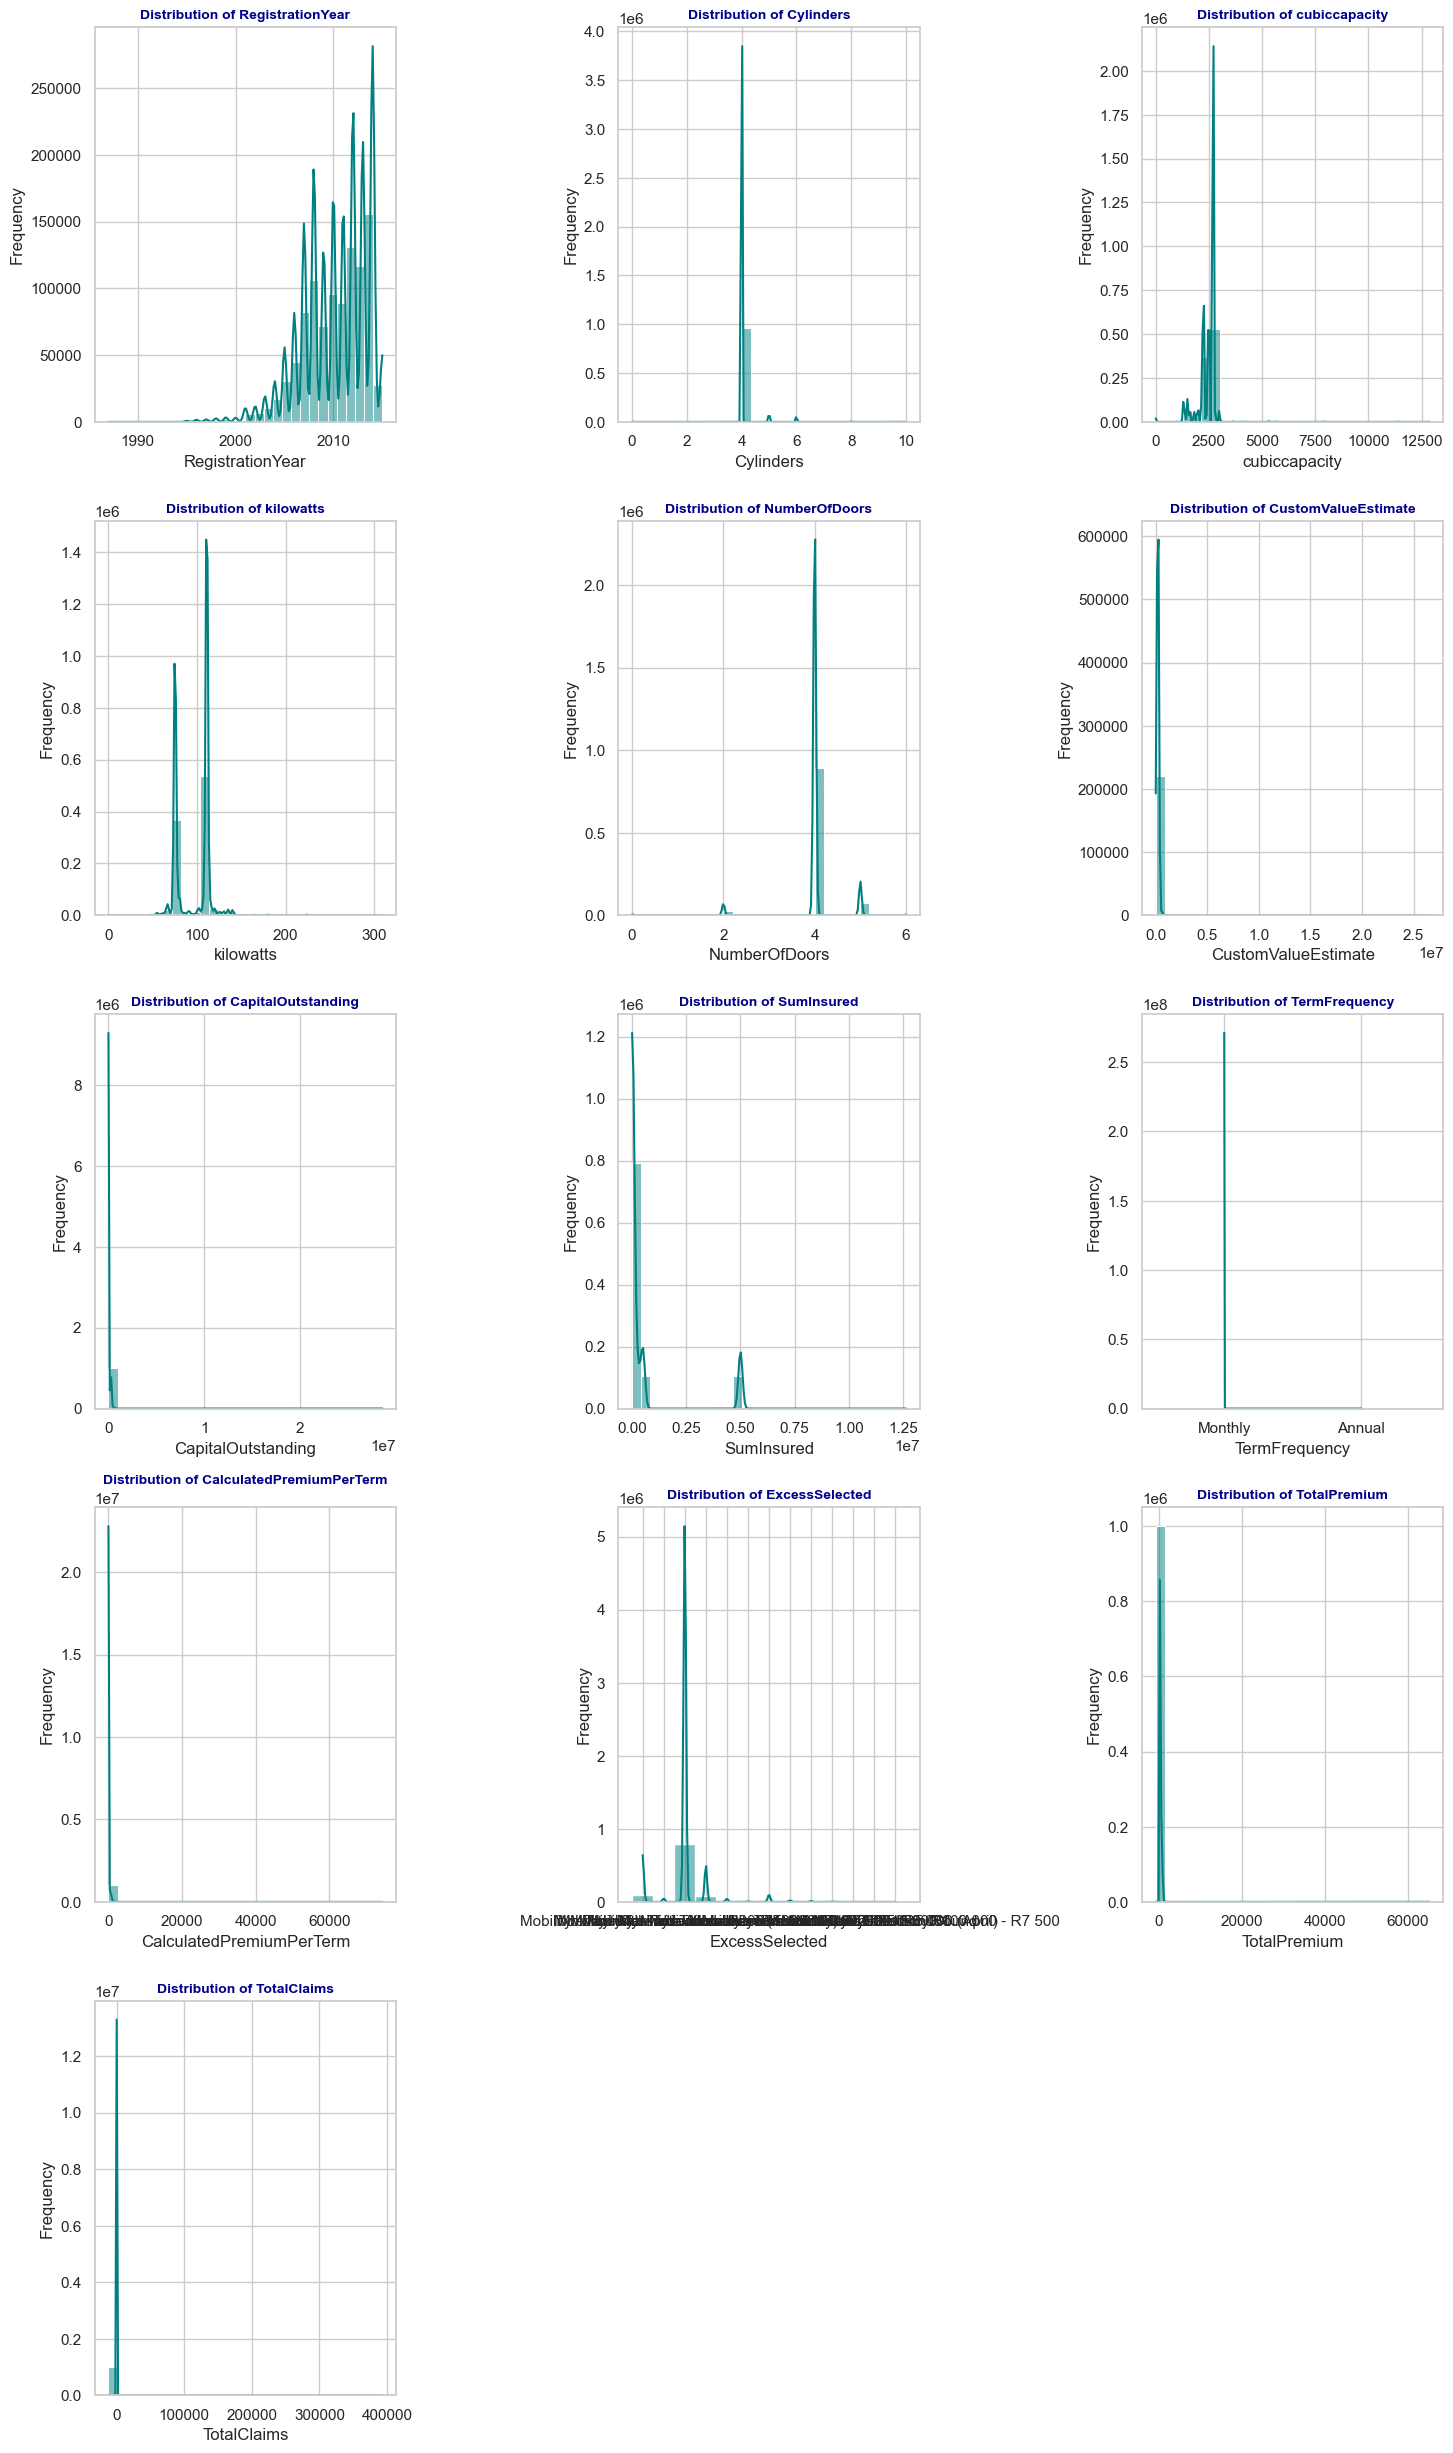

In [106]:
# Set the style and palette
sns.set(style="whitegrid", palette="husl")

#  numerical columns
numerical_cols = [
    'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 
    'NumberOfDoors', 'CustomValueEstimate', 'CapitalOutstanding', 
    'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 
    'ExcessSelected', 'TotalPremium', 'TotalClaims'
]

# use 3 columns for the layout
num_cols = 3  # Number of columns in the grid
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Calculate the number of rows

# Create subplots with a slightly wider figure size and reduced spacing
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  

axes = axes.flatten()

# Plot histograms for numerical columns
for ax, col in zip(axes, numerical_cols):
    sns.histplot(data[col].dropna(), kde=True, bins=30, ax=ax, color='teal')
    ax.set_title(f'Distribution of {col}', fontsize=10, fontweight='bold', color='darkblue')  # Smaller font size
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for ax in axes[len(numerical_cols):]:
    ax.axis('off')

# reduce spacing between subplots
plt.tight_layout(pad=2.0)  

plt.savefig(r'C:\Users\THINKPAD\OneDrive\Desktop\Ramlla\Week_3\notebooks\task1\results', dpi=300)
plt.show()


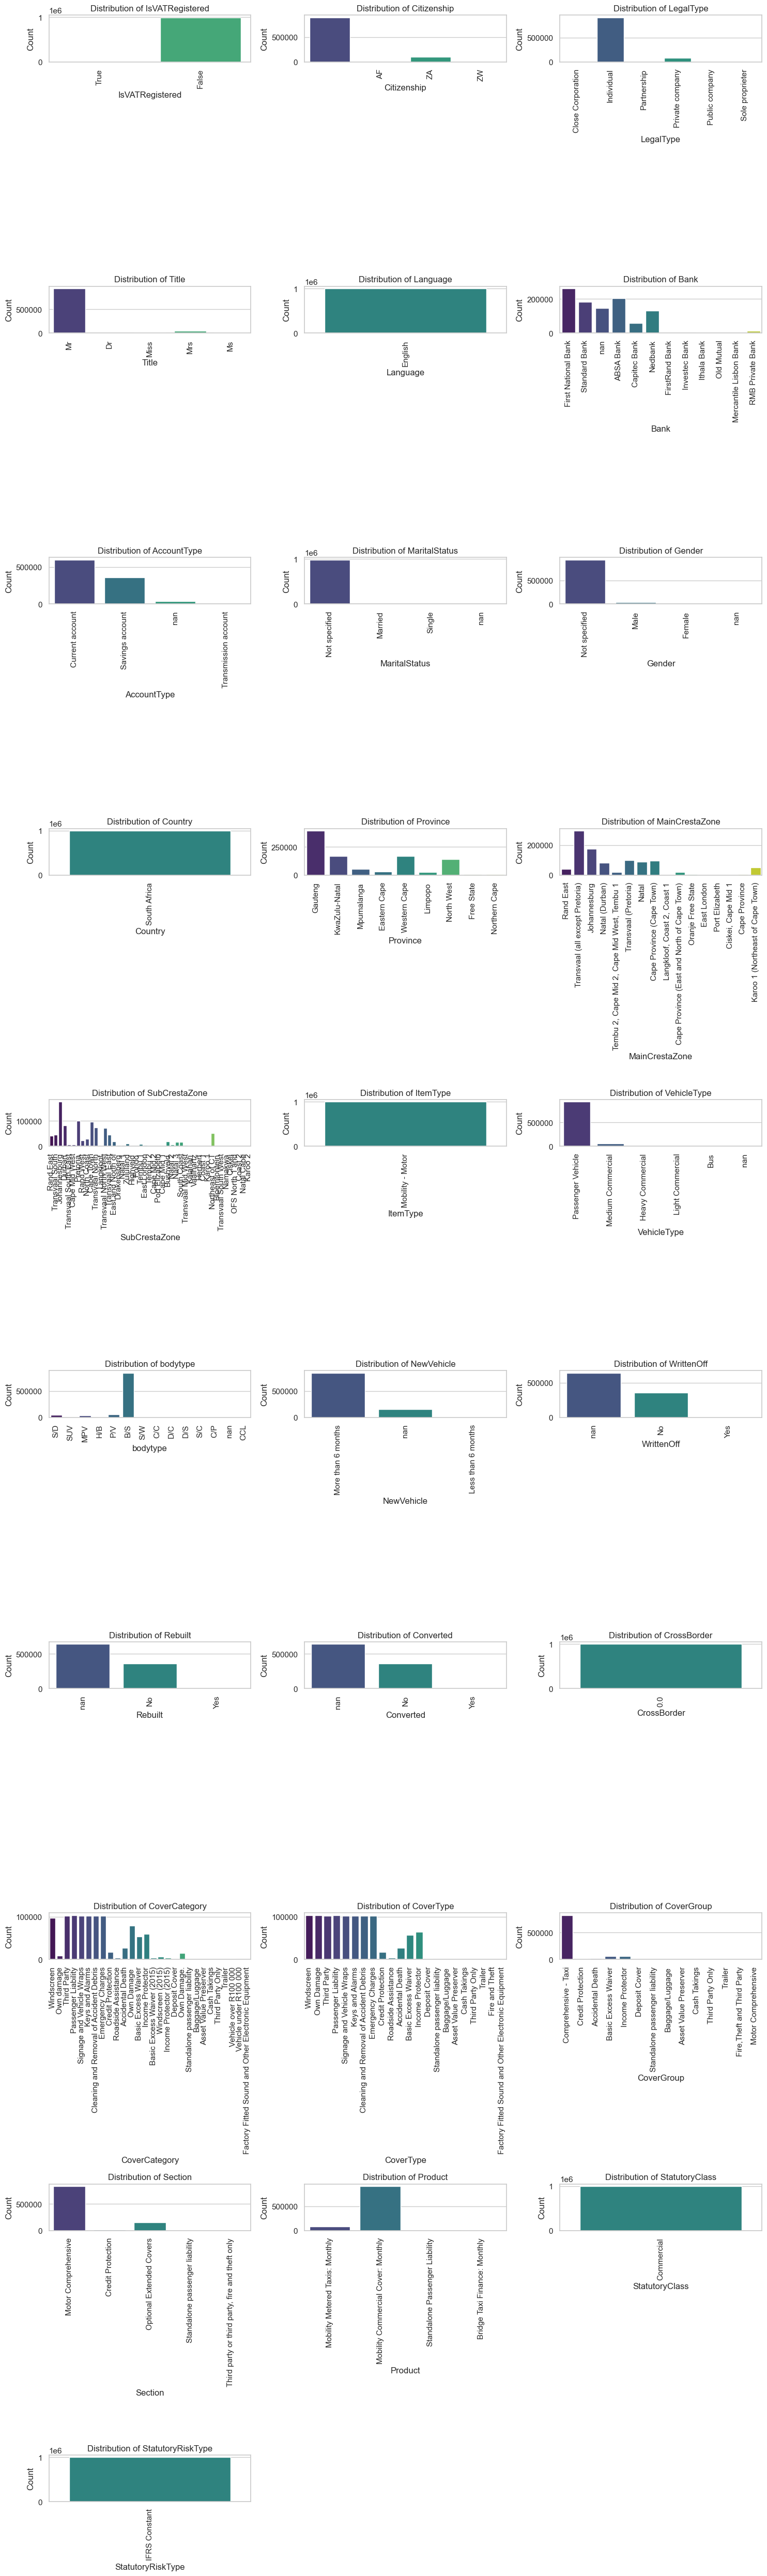

In [108]:
# List of categorical columns
categorical_cols = [
    'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 
    'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 
    'MainCrestaZone', 'SubCrestaZone', 'ItemType', 
    'VehicleType', 'bodytype', 'NewVehicle', 'WrittenOff', 'Rebuilt', 
    'Converted', 'CrossBorder', 'CoverCategory', 'CoverType', 'CoverGroup', 
    'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]

# Plot distributions
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=data[col].astype(str), ax=axes[i], palette='viridis', hue=data[col].astype(str), legend=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


plt.savefig(r'C:\Users\THINKPAD\OneDrive\Desktop\Ramlla\Week_3\notebooks\task1\results', dpi=300)
plt.show()



# Bivariate and Multivariate Analysis
a. Correlation and Heatmaps:

# b. Relationships Between Numerical Variables:

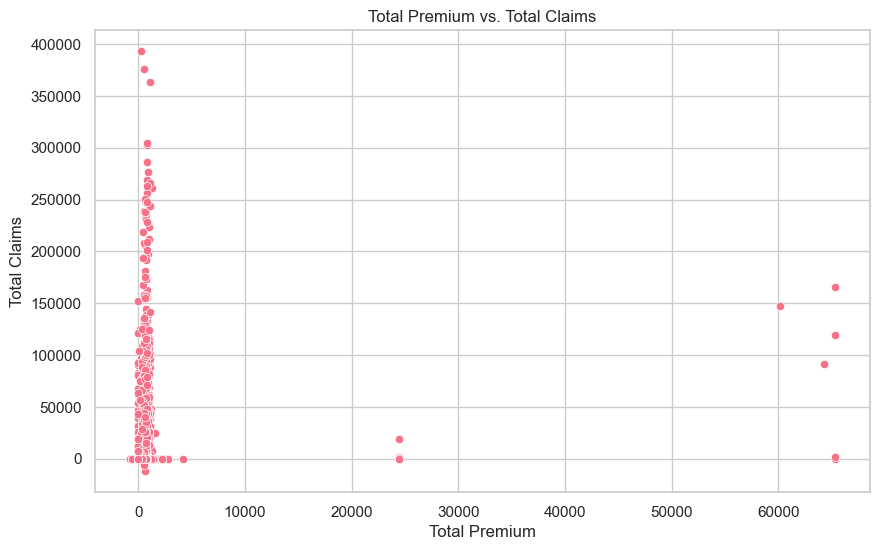

In [109]:
# Scatter plots between selected numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=data)
plt.title('Total Premium vs. Total Claims')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')


plt.savefig(r'C:\Users\THINKPAD\OneDrive\Desktop\Ramlla\Week_3\notebooks\task1\results', dpi=300)
plt.show()


#  Outlier Detection
a. Box Plots for Outlier Detection: